# Approved Building Permits Dataset

The Approved Building Permits (ABP) dataset contains information on building permits issued across Boston from 2010 to 2024. It provide insights into city maintenance and development patterns. More information can be found via the following link: https://data.boston.gov/dataset/approved-building-permits. 

In this notebook, we will... 
- Clean and pre-process the dataset
- Conduct base analysis on the dataset 
- Gather useful insights on permits in District 7 from 2014 to 2024 

Then, we will gather the following key insights: 
- The distribution of permits by work types over time 
- The distribution of permits by occupancy types over time 
- The distribution of permits by permit status over time 
- The number and declared value of permits by neighborhoods

## Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

To start with, we load the ABP dataset from GitHub repository to make sure the notebook is reproducible for others. 

In [2]:
df = pd.read_csv("../data/d7-approved-building-permit-new.csv", low_memory=False)

In [3]:
df

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,city,state,zip,property_id,parcel_id,gpsy,gpsx,y_latitude,x_longitude,is_d7
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,2021-07-28 04:00:00+00,...,Boston,MA,02109,130392.0,3.038070e+08,2.956235e+06,777000.467910,42.359190,-71.052924,False
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$29.00,2011-11-04 15:04:58+00,2012-05-04 04:00:00+00,...,West Roxbury,MA,02132,17268.0,2.012032e+09,2.920239e+06,751016.119617,42.260750,-71.149611,False
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00,NaN,...,Charlestown,MA,02129,113443.0,2.028370e+08,2.962078e+06,775710.380595,42.375243,-71.057585,False
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,2020-05-13 04:00:00+00,...,Roxbury,MA,02118,129994.0,4.025580e+08,2.949423e+06,769648.312667,42.340600,-71.080251,True
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$182.00,2013-01-03 19:13:09+00,2013-07-03 04:00:00+00,...,Brighton,MA,02135,149852.0,2.204944e+09,2.950791e+06,749690.298777,42.344600,-71.154051,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666227,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...,Christine McMahon,$0.00,$50.00,2019-09-25 15:36:11+00,2020-03-25 04:00:00+00,...,Boston,MA,02114,154961.0,3.027170e+08,2.956658e+06,774864.862273,42.360383,-71.060818,False
666228,U49993492,TEMTRL,Use of Premises,Temporary Trailers,Temporary Construction Trailer at Herb Chamber...,Regina Olivieri,"$1,000.00",$53.00,2019-09-12 17:07:00+00,2020-03-12 04:00:00+00,...,Allston,MA,02134,424193.0,2.101574e+09,2.952823e+06,756414.438216,42.350100,-71.129145,False
666229,U4999352,DRIVE,Use of Premises,Driveway Installation,Owners would like to install a curb cut and a ...,Maria Dubrowski,"$2,700.00",$53.00,2012-05-30 18:28:59+00,2012-11-30 05:00:00+00,...,Jamaica Plain,MA,02130,24047.0,1.901861e+09,2.939398e+06,759722.466377,42.313220,-71.117131,False
666230,U49996367,RESPAR,Use of Premises,Residential Parking,2 car parking,Cesar DaSilva,"$7,000.00",$53.00,2023-04-10 15:10:24+00,2023-10-10 04:00:00+00,...,Dorchester,MA,02124,34863.0,1.701519e+09,2.931227e+06,771088.017082,42.290650,-71.075261,False


## Data Cleaning 

Then, we clean the dataset to make it easier for visualization in the notebook and on Looker Studio. 

We noticed that the variables worktype, permittypedescr, description, and comments are fundamentally describing the permit work types in similar ways. As the permittypedescr, description, and comments are too detailed for analysis, we decided to focus on worktype. But because worktype has 65 distinct values, we grouped them into 9 major categories to form a better understanding. 

In [4]:
worktype_mapping = {
    'INTEXT': 'Renovation & Interior/Exterior Work',
    'INTREN': 'Renovation & Interior/Exterior Work',
    'EXTREN': 'Renovation & Interior/Exterior Work',
    'OTHER': 'Miscellaneous',
    'SPRINK': 'Fire Protection & Safety',
    'ADDITION': 'Renovation & Interior/Exterior Work',
    'COB': 'Miscellaneous',
    'FA': 'Fire Protection & Safety',
    'ERECT': 'Construction & New Installations',
    'SITE': 'Temporary Structures & Events',
    'VIOL': 'Miscellaneous',
    'PLUMBING': 'Electrical, Plumbing & Utility Systems',
    'SPCEVE': 'Temporary Structures & Events',
    'NEWCON': 'Construction & New Installations',
    'SIGNES': 'Signage & Canopy',
    'SPRNK9': 'Fire Protection & Safety',
    'EXTDEM': 'Demolition',
    'SD': 'Miscellaneous',
    'ROOF': 'Renovation & Interior/Exterior Work',
    'GARAGE': 'Construction & New Installations',
    'AWNING': 'Signage & Canopy',
    'FENCE2': 'Renovation & Interior/Exterior Work',
    'INSUL': 'Renovation & Interior/Exterior Work',
    'SIGNS': 'Signage & Canopy',
    'FSTTRK': 'Temporary Structures & Events',
    'CHGOCC': 'Occupancy & Use Change',
    'CELL': 'Temporary Structures & Events',
    'NROCC': 'Miscellaneous',
    'SOL': 'Construction & New Installations',
    'INTDEM': 'Demolition',
    'SPFT': 'Miscellaneous',
    'RAZE': 'Demolition',
    'TMPSER': 'Temporary Structures & Events',
    'ELECTRICAL': 'Electrical, Plumbing & Utility Systems',
    'GEN': 'Electrical, Plumbing & Utility Systems',
    'CANP': 'Signage & Canopy',
    'FENCE': 'Renovation & Interior/Exterior Work',
    'SIDE': 'Renovation & Interior/Exterior Work',
    'HOLVEN': 'Miscellaneous',
    'CONVRT': 'Miscellaneous',
    'SRVCHG': 'Electrical, Plumbing & Utility Systems',
    'LVOLT': 'Electrical, Plumbing & Utility Systems',
    'MAINT': 'Miscellaneous',
    'Service': 'Miscellaneous',
    'DRIVE': 'Construction & New Installations',
    'INDBLR': 'Electrical, Plumbing & Utility Systems',
    'TEMTRL': 'Temporary Structures & Events',
    'FLAM': 'Fire Protection & Safety',
    'COMPAR': 'Miscellaneous',
    'TVTRK': 'Temporary Structures & Events',
    'New': 'Construction & New Installations',
    'GAS': 'Electrical, Plumbing & Utility Systems',
    'INDFUR': 'Electrical, Plumbing & Utility Systems',
    'AWNRNW': 'Signage & Canopy',
    'RNWSIG': 'Signage & Canopy',
    'RESPAR': 'Miscellaneous',
    'AWNRET': 'Signage & Canopy',
    'BFCHMINFIN': 'Miscellaneous',
    'BFCHMTENT': 'Temporary Structures & Events',
    'General': 'Miscellaneous',
    'Dumpsters': 'Miscellaneous',
    'TMPUSOC': 'Occupancy & Use Change',
    'OSEAT': 'Temporary Structures & Events',
    'CANPRN': 'Signage & Canopy',
    'TCOO': 'Temporary Structures & Events'
}

df['new_worktype'] = df['worktype'].map(worktype_mapping)

df


,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,state,zip,property_id,parcel_id,gpsy,gpsx,y_latitude,x_longitude,is_d7,new_worktype
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,2021-07-28 04:00:00+00,...,MA,02109,130392.0,3.038070e+08,2.956235e+06,777000.467910,42.359190,-71.052924,False,Renovation & Interior/Exterior Work
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$29.00,2011-11-04 15:04:58+00,2012-05-04 04:00:00+00,...,MA,02132,17268.0,2.012032e+09,2.920239e+06,751016.119617,42.260750,-71.149611,False,Miscellaneous
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00,NaN,...,MA,02129,113443.0,2.028370e+08,2.962078e+06,775710.380595,42.375243,-71.057585,False,Miscellaneous
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,2020-05-13 04:00:00+00,...,MA,02118,129994.0,4.025580e+08,2.949423e+06,769648.312667,42.340600,-71.080251,True,Renovation & Interior/Exterior Work
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$182.00,2013-01-03 19:13:09+00,2013-07-03 04:00:00+00,...,MA,02135,149852.0,2.204944e+09,2.950791e+06,749690.298777,42.344600,-71.154051,False,Renovation & Interior/Exterior Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666227,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...,Christine McMahon,$0.00,$50.00,2019-09-25 15:36:11+00,2020-03-25 04:00:00+00,...,MA,02114,154961.0,3.027170e+08,2.956658e+06,774864.862273,42.360383,-71.060818,False,Temporary Structures & Events
666228,U49993492,TEMTRL,Use of Premises,Temporary Trailers,Temporary Construction Trailer at Herb Chamber...,Regina Olivieri,"$1,000.00",$53.00,2019-09-12 17:07:00+00,2020-03-12 04:00:00+00,...,MA,02134,424193.0,2.101574e+09,2.952823e+06,756414.438216,42.350100,-71.129145,False,Temporary Structures & Events
666229,U4999352,DRIVE,Use of Premises,Driveway Installation,Owners would like to install a curb cut and a ...,Maria Dubrowski,"$2,700.00",$53.00,2012-05-30 18:28:59+00,2012-11-30 05:00:00+00,...,MA,02130,24047.0,1.901861e+09,2.939398e+06,759722.466377,42.313220,-71.117131,False,Construction & New Installations
666230,U49996367,RESPAR,Use of Premises,Residential Parking,2 car parking,Cesar DaSilva,"$7,000.00",$53.00,2023-04-10 15:10:24+00,2023-10-10 04:00:00+00,...,MA,02124,34863.0,1.701519e+09,2.931227e+06,771088.017082,42.290650,-71.075261,False,Miscellaneous


We dropped the following irrelevant variables that we won't be using: worktype, permittypedescr, description, comments, applicant, property_id, parcel_id, gpsy, gpsx

In [5]:
df.drop(columns=['worktype', 'permittypedescr', 'description', 'comments', 'applicant', 
                'property_id', 'parcel_id', 'gpsy', 'gpsx'], inplace=True)

The variables declared_valuation and total_fees' formats need to be transformed into numerical values. 

In [6]:
df['declared_valuation'] = df['declared_valuation'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['total_fees'] = df['total_fees'].replace({'\$': '', ',': ''}, regex=True).astype(float)

worktype_value_df = df.groupby('new_worktype')[['declared_valuation', 'total_fees']].sum().reset_index()

worktype_value_df['declared_valuation'] = worktype_value_df['declared_valuation'].apply(lambda x: f"${x:,.2f}")
worktype_value_df['total_fees'] = worktype_value_df['total_fees'].apply(lambda x: f"${x:,.2f}")

worktype_value_df

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_79039/309331977.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['declared_valuation'] = df['declared_valuation'].replace({'\$': '', ',': ''}, regex=True).astype(float)
/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_79039/309331977.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['total_fees'] = df['total_fees'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,new_worktype,declared_valuation,total_fees
0,Construction & New Installations,"$85,347,198,595.03","$405,278,004.41"
1,Demolition,"$907,490,888.92","$8,223,113.77"
2,"Electrical, Plumbing & Utility Systems","$20,125,912,787.24","$49,909,448.71"
3,Fire Protection & Safety,"$946,168,047.52","$10,629,635.12"
4,Miscellaneous,"$12,168,629,014.68","$24,678,870.93"
5,Occupancy & Use Change,"$10,532,113,405.59","$58,478,401.16"
6,Renovation & Interior/Exterior Work,"$38,829,953,439.84","$272,958,222.18"
7,Signage & Canopy,"$89,888,689.16","$1,204,245.83"
8,Temporary Structures & Events,"$15,932,988,719.91","$99,302,730.99"


For variables issued_date and expiration_date, we only keep year and month and remove date and time. We also make a new column issued_year to only display the year. 

In [7]:
df['issued_date'] = pd.to_datetime(df['issued_date'], errors='coerce', format='mixed').dt.to_period('M')
df['expiration_date'] = pd.to_datetime(df['expiration_date'], errors='coerce', format='mixed').dt.to_period('M')
df['issued_year'] = df['issued_date'].dt.year

/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_79039/2120645161.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['issued_date'] = pd.to_datetime(df['issued_date'], errors='coerce', format='mixed').dt.to_period('M')
/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_79039/2120645161.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['expiration_date'] = pd.to_datetime(df['expiration_date'], errors='coerce', format='mixed').dt.to_period('M')


In [8]:
value_by_year_df = df.groupby(['issued_year'])[['declared_valuation', 'total_fees']].sum().reset_index()

value_by_year_df['declared_valuation'] = value_by_year_df['declared_valuation'].apply(lambda x: f"${x:,.2f}")
value_by_year_df['total_fees'] = value_by_year_df['total_fees'].apply(lambda x: f"${x:,.2f}")

value_by_year_df

,issued_year,declared_valuation,total_fees
0,2006,$0.00,$0.00
1,2007,$0.00,$0.00
2,2009,"$18,036,779.51","$523,624.12"
3,2010,"$4,615,516,792.86","$22,950,101.15"
4,2011,"$4,539,212,433.57","$37,918,935.31"
5,2012,"$6,548,828,100.47","$33,974,543.74"
6,2013,"$7,891,543,128.50","$45,789,891.80"
7,2014,"$9,730,955,533.71","$60,526,394.02"
8,2015,"$12,234,840,718.58","$74,321,608.33"
9,2016,"$12,495,538,160.83","$59,301,834.19"


The variable status have 4 values: Open, Closed, Stop Work, and Issued. Since Stop Work and Issued only have 5 values in total, they are dropped. 

In [9]:
df['status'].value_counts()

status
Open         395922
Closed       270305
Issued            3
Stop Work         2
Name: count, dtype: int64

In [10]:
df = df[~df['status'].isin(['Stop Work', 'Issued'])]

In [11]:
df['status'].value_counts()

status
Open      395922
Closed    270305
Name: count, dtype: int64

There are 17 distinct values under the variable occupancytype. We renamed the values as they are not intuitive to understand. 

In [12]:
occupancytype_map = {
    '1-2FAM': '1-2 Family Residential',
    '1-3FAM': '1-3 Family Residential',
    '1-4FAM': '1-4 Family Residential',
    '1-7FAM': '1-7 Family Residential',
    'Multi': 'Multi-family Residential',
    'Comm': 'Commercial',
    'Mixed': 'Residential & Commercial',
    'Other': 'Other',
    '1Unit': 'Single Unit Residential',
    'VacLd': 'Vacant Land',
    '7More': '7 or More Units',
    '3unit': '3 Unit Residential',
    '2unit': '2 Unit Residential',
    '4unit': '4 Unit Residential',
    '6unit': '6 Unit Residential',
    '5unit': '5 Unit Residential',
    '7unit': '7 Unit Residential'
}

df['new_occupancytype'] = df['occupancytype'].map(occupancytype_map)

/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_79039/3987663747.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_occupancytype'] = df['occupancytype'].map(occupancytype_map)


Since 17 distinct occupancy types can still be too detailed, we grouped them into 6 major categories. 

In [13]:
occupancytype_category_map = {
    'Family Residential': ['1-2 Family Residential', '1-3 Family Residential', '1-4 Family Residential', '1-7 Family Residential', 'Single Unit Residential'],
    'Multi-family Residential': ['Multi-family Residential', '2 Unit Residential', '3 Unit Residential', '4 Unit Residential', '5 Unit Residential', '6 Unit Residential', '7 Unit Residential', '7 or More Units'],
    'Commercial': ['Commercial'],
    'Mixed Use': ['Residential & Commercial'],
    'Vacant Land': ['Vacant Land'],
    'Other': ['Other']
}

def categorize_occupancytype(value):
    for category, types in occupancytype_category_map.items():
        if value in types:
            return category
    return 'Unknown'

df['new_occupancytype_category'] = df['new_occupancytype'].apply(categorize_occupancytype)


/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_79039/1737075157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_occupancytype_category'] = df['new_occupancytype'].apply(categorize_occupancytype)


In [14]:
value_by_occupancy_df = df.groupby(['new_occupancytype_category'])[['declared_valuation', 'total_fees']].sum().reset_index()

value_by_occupancy_df['declared_valuation'] = value_by_occupancy_df['declared_valuation'].apply(lambda x: f"${x:,.2f}")
value_by_occupancy_df['total_fees'] = value_by_occupancy_df['total_fees'].apply(lambda x: f"${x:,.2f}")

value_by_occupancy_df

,new_occupancytype_category,declared_valuation,total_fees
0,Commercial,"$87,336,449,734.77","$456,602,832.08"
1,Family Residential,"$9,251,344,576.06","$75,414,354.24"
2,Mixed Use,"$44,333,163,110.35","$213,536,286.03"
3,Multi-family Residential,"$23,666,402,019.10","$94,802,815.88"
4,Other,"$13,865,093,483.35","$58,608,979.12"
5,Unknown,"$591,790,228.94","$1,928,796.96"
6,Vacant Land,"$7,991,081,600.21","$37,722,266.31"


The variable city contains messy values, meaning the naming method is inconsistent and sometimes repetitive. So we grouped them based on the location and adjusted the naming format.

In [15]:
df['city'].unique()

array(['Boston', 'West Roxbury', 'Charlestown', 'Roxbury', 'Brighton',
       'Allston', 'Jamaica Plain', 'East Boston', 'Dorchester',
       'Hyde Park', 'South Boston', 'Roslindale', 'Mission Hill',
       'Mattapan', 'Jamaica Plain/', 'Chestnut Hill', 'NorthEnd/',
       'BOSTON', 'South Boston/', 'Mission Hill/', 'HYDE PARK',
       'Boston/West End', 'West End', 'NorthEnd', 'Dorchester/',
       'Roxbury/', 'Fenway', 'Boston/Roxbury', 'ROXBURY', 'South End',
       'BOSTON/', 'Charlestown/', 'Back Bay/Boston', nan,
       'Boston/Downtown', "Boston's Historic North End",
       'Dorchester Center/', 'Financial District', 'Dorchester Center',
       'Downtown/Financial District', 'Dorchester (Lower Mills)/',
       'BRIGHTON', 'ALLSTON', 'Dorchester//', 'Fenway/',
       'Boston/Beacon Hill', 'Boston/Chinatown', 'Chinatown',
       'SOUTH BOSTON', 'Hyde Park/', 'DORCHESTER', 'South End/',
       'BRIGHTON/', 'BOSTON/Waterfront', 'Boston/Back Bay', 'MATTAPAN',
       'Boston/Fenway/

In [16]:
def clean_city_name(city):
    if pd.isna(city) or city.strip() == '': 
        return None
    
    # Standardize capitalization and remove extra spaces or non-alphanumeric characters
    city = city.strip().title().replace('/', '').replace("\\", "").replace("'", "").replace("-", "").replace("=", "").replace("+", "")
    
    city_mapping = {
        # Boston-related
        'Boston/Back Bay': 'Back Bay',
        'Boston/West End': 'West End',
        'Boston/Roxbury': 'Roxbury',
        'Boston/Downtown': 'Downtown',
        'Boston/Fenway/Kenmore/Audubo': 'Fenway/Kenmore',
        'Boston/Beacon Hill': 'Beacon Hill',
        'Boston/North End': 'North End',
        'Boston/Charlestown': 'Charlestown',
        'Boston/Roslindale': 'Roslindale',
        'Boston/South End': 'South End',
        'Boston/South': 'South End',
        'Boston/Chinatown': 'Chinatown',
        'Boston/Waterfront': 'Waterfront',
        'Boston': 'Boston',
        'BostonDowntown': 'Downtown', 
        'DowntownFinancial District': 'Downtown',
        
        # Roxbury-related
        'Roxbury/': 'Roxbury',
        'Roxbury Crossin': 'Roxbury',
        'Ropxbury': 'Roxbury',
        'Roxbury': 'Roxbury',
        'BostonRoxbury': 'Roxbury', 
        
        # Dorchester-related
        'Dorchester/': 'Dorchester',
        'Dorchester (Lower Mills)': 'Dorchester',
        'Dorchester (Savin Hill)': 'Dorchester',
        'Dorchester': 'Dorchester',
        'Dorchester Center': 'Dorchester',
        
        # East Boston-related
        'East Boston/': 'East Boston',
        'East Bostonboston': 'East Boston',
        'E Boston': 'East Boston',
        'East Boston': 'East Boston',
        
        # South Boston-related
        'South Boston/': 'South Boston',
        'South Boston/South Boston': 'South Boston',
        'South Boston': 'South Boston',
        'South Bostonsouth Boston': 'South Boston',
        'South Bostonsg': 'South Boston',
        'South': 'South Boston',
        
        # Brighton-Allston-related
        'Brighton/Allston': 'Allston/Brighton',
        'Allston/Brighton': 'Allston/Brighton',
        'Brighton / Allston': 'Allston/Brighton',
        'Allstonboston': 'Allston/Brighton',
        'Brightonallston': 'Allston/Brighton',
        'Brighton Allston': 'Allston/Brighton',
        'Allstonbrighton': 'Allston/Brighton',
        'Brighton#': 'Allston/Brighton',
        
        # Hyde Park-related
        'Hyde PArk': 'Hyde Park',
        'Hyde Park': 'Hyde Park',
        
        # Other corrections
        'West End': 'West End',
        'BostonWest End': 'West End',
        'Theater District': 'Downtown',
        'Financial District': 'Downtown',
        'Financial District/': 'Downtown',
        "Boston's Historic North End": 'North End',
        'Northend': 'North End',
        'North End': 'North End',
        'Kenmore/Fenway': 'Fenway/Kenmore',
        'Fenwaykenmoreaudubo': 'Fenway/Kenmore',
        'Kenmorefenway': 'Fenway/Kenmore',
        'Mission Hill': 'Mission Hill',
        "Mission Hill'": 'Mission Hill',
        'Jamaica Plain.': 'Jamaica Plain',
        'Jamaica Plainboston': 'Jamaica Plain',
        'Back Bayboston': 'Back Bay',
        'Mattapan': 'Mattapan',
        'Chestnut Hill': 'Chestnut Hill',
        'Roslindale': 'Roslindale',
        'Back Bay': 'Back Bay',
        'Charlestown': 'Charlestown',
        'Charlestownboston': 'Charlestown',
        'Charlestown\\=-0=]\\[=-': 'Charlestown',
        'Charlestown+': 'Charlestown',
        'Charlestown+-+-+-+-+-+': 'Charlestown',
        'Downtown': 'Downtown',
        'Downtownfinancial': 'Downtown',
        'Downtownfinancial District': 'Downtown',
        'Beacon Hill': 'Beacon Hill',
        'Chinatown': 'Chinatown',
        'Waterfront': 'Waterfront',
        'Back': 'Back Bay',
        'Back BayBoston': 'Back Bay', 
        'BostonS Historic North End': 'North End', 
        'BostonBeacon Hill': 'Beacon Hill', 
        'BostonChinatown': 'Chinatown', 
         'BostonWaterfront': 'Waterfront',
        'BostonBack Bay': 'Back Bay',
        'BostonFenwayKenmoreAudubo': 'Fenway/Kenmore',
        'AllstonBoston': 'Allston/Brighton',
        'South BostonSouth Boston': 'South Boston',
        'BrightonAllston': 'Allston/Brighton',
        'Jamaica PlainBoston': 'Jamaica Plain',
        'CharlestownBoston': 'Charlestown',
        'BostonBoston': 'Boston',
        'BostonSouth End': 'South End',
        'BostonSouth': 'South End',
        'Charleswtown': 'Charlestown',
        'Brighton/Allston': 'Allston/Brighton',
        'BostonNorth End': 'North End',
        'BostonRoslindale': 'Roslindale',
        'KenmoreFenway': 'Fenway/Kenmore',
        'BostonCharlestown': 'Charlestown',
        'Dorchester(Lower Mills)': 'Dorchester',
        'BostonFenway': 'Fenway/Kenmore',
        'Brighton Allston': 'Allston/Brighton',
        'AllstonBrighton': 'Allston/Brighton',
        'Charlestown0][': 'Charlestown',
        'DowntownFinancial': 'Downtown',
        'East BostonBoston': 'East Boston', 
        'Back': 'Back Bay', 
        'Brighton/Allston': 'Allston/Brighton', 
        'Brighton Allston': 'Allston/Brighton'
    }
    
    city = city_mapping.get(city, city)
    
    city = ' '.join(city.split())
    
    return city

df['new_city'] = df['city'].apply(clean_city_name)

df = df.dropna(subset=['new_city'])
df = df[~df['new_city'].isin(['Back', 'Brighton Allston'])]

city_counts = df['new_city'].value_counts()
print(city_counts)

/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_79039/1715055861.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_city'] = df['city'].apply(clean_city_name)


new_city
Boston              227158
Dorchester           96784
Roxbury              51716
Jamaica Plain        38616
South Boston         34320
Roslindale           31836
West Roxbury         30719
East Boston          30218
Brighton             28931
Hyde Park            25426
Charlestown          22498
Mattapan             21490
Allston              12874
Mission Hill          8896
Chestnut Hill         1779
Downtown               828
West End               497
South End              456
Waterfront             367
Fenway                 297
North End              101
Beacon Hill             70
Back Bay                61
Chinatown               59
Allston/Brighton        39
Fenway/Kenmore          23
                         8
Name: count, dtype: int64


In [17]:
df['new_city'].unique()

array(['Boston', 'West Roxbury', 'Charlestown', 'Roxbury', 'Brighton',
       'Allston', 'Jamaica Plain', 'East Boston', 'Dorchester',
       'Hyde Park', 'South Boston', 'Roslindale', 'Mission Hill',
       'Mattapan', 'Chestnut Hill', 'North End', 'West End', 'Fenway',
       'South End', 'Back Bay', 'Downtown', 'Beacon Hill', 'Chinatown',
       'Waterfront', 'Fenway/Kenmore', '', 'Allston/Brighton'],
      dtype=object)

In [18]:
value_by_city_df = df.groupby(['new_city'])[['declared_valuation', 'total_fees']].sum().reset_index()

value_by_city_df['declared_valuation'] = value_by_city_df['declared_valuation'].apply(lambda x: f"${x:,.2f}")
value_by_city_df['total_fees'] = value_by_city_df['total_fees'].apply(lambda x: f"${x:,.2f}")

value_by_city_df

,new_city,declared_valuation,total_fees
0,,"$43,171.00",$639.00
1,Allston,"$8,298,751,253.30","$35,340,001.63"
2,Allston/Brighton,"$3,886,121.00","$23,977.50"
3,Back Bay,"$121,229,803.00","$1,241,848.00"
4,Beacon Hill,"$1,810,911.00","$12,959.05"
5,Boston,"$111,259,513,693.03","$588,968,706.31"
6,Brighton,"$9,353,984,349.15","$49,778,491.25"
7,Charlestown,"$4,136,937,279.38","$22,114,227.79"
8,Chestnut Hill,"$23,442,207.44","$261,674.55"
9,Chinatown,"$1,847,577.54","$15,795.00"


We previously turned the ABP dataset into shapefile, and we want to make the variable is_d7 more intuitive for visualization. 

In [19]:
df['district_label'] = df['is_d7'].replace({True: 'District 7', False: 'Boston'})

Based on client's request, we want to take a closer look at the permit trend from 2014 to 2024, so we filter the dataset based on the timeframe. 

In [20]:
df = df[(df['issued_year'] >= 2014) & (df['issued_year'] <= 2024)]

Now, we save the dataset as two versions: 
1. District 7 only 
2. Other Boston areas only
3. Boston as a whole

In [21]:
df_d7 = df[df['district_label'] == 'District 7']
df_d7

,permitnumber,declared_valuation,total_fees,issued_date,expiration_date,status,occupancytype,sq_feet,address,city,...,zip,y_latitude,x_longitude,is_d7,new_worktype,issued_year,new_occupancytype,new_occupancytype_category,new_city,district_label
3,A1001201,74295.75,803.0,2019-11,2020-05,Closed,Multi,0.0,211 W Springfield ST,Roxbury,...,02118,42.340600,-71.080251,True,Renovation & Interior/Exterior Work,2019,Multi-family Residential,Multi-family Residential,Roxbury,District 7
8,A1002830,0.00,26.0,2019-10,2020-04,Open,1-3FAM,0.0,52 Guild ST,Roxbury,...,02119,42.327064,-71.089975,True,Renovation & Interior/Exterior Work,2019,1-3 Family Residential,Family Residential,Roxbury,District 7
10,A1003458,1.00,30.0,2021-02,2021-08,Open,1-2FAM,0.0,170 W Brookline ST,Roxbury,...,02118,42.342600,-71.076191,True,Renovation & Interior/Exterior Work,2021,1-2 Family Residential,Family Residential,Roxbury,District 7
35,A1009433,0.00,29.0,2019-10,2020-04,Open,1-2FAM,0.0,43-45 Forest ST,Roxbury,...,02119,42.326340,-71.077393,True,Miscellaneous,2019,1-2 Family Residential,Family Residential,Roxbury,District 7
36,A1009433,0.00,29.0,2019-10,2020-04,Open,1-2FAM,0.0,43-45 Forest ST,Roxbury,...,02119,42.326340,-71.077393,True,Miscellaneous,2019,1-2 Family Residential,Family Residential,Roxbury,District 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666125,U49898417,3200.00,59.0,2019-04,2019-10,Open,1-4FAM,0.0,10 Copeland PK,Roxbury,...,02119,42.322919,-71.079311,True,Miscellaneous,2019,1-4 Family Residential,Family Residential,Roxbury,District 7
666126,U49898417,3200.00,59.0,2019-04,2019-10,Open,1-4FAM,0.0,10 Copeland PK,Roxbury,...,02119,42.322919,-71.079311,True,Miscellaneous,2019,1-4 Family Residential,Family Residential,Roxbury,District 7
666138,U49909001,1.00,50.0,2020-01,2020-07,Open,Other,0.0,709 Columbus AV,Boston,...,02120,42.338409,-71.084875,True,Miscellaneous,2020,Other,Other,Boston,District 7
666177,U49935734,20000.00,50.0,2020-01,2020-07,Open,1-3FAM,0.0,5 Carlisle ST,Dorchester,...,02121,42.314100,-71.082781,True,Miscellaneous,2020,1-3 Family Residential,Family Residential,Dorchester,District 7


In [22]:
df_d7.to_csv("../data/d7-ABP-cleaned.csv", index=False)

In [38]:
df_boston = df[df['district_label'] == 'Boston']
df_boston

,permitnumber,declared_valuation,total_fees,issued_date,expiration_date,status,occupancytype,sq_feet,address,city,...,zip,y_latitude,x_longitude,is_d7,new_worktype,issued_year,new_occupancytype,new_occupancytype_category,new_city,district_label
0,A1000569,36500.0,390.0,2021-01,2021-07,Open,Mixed,0.0,181-183 State ST,Boston,...,02109,42.359190,-71.052924,False,Renovation & Interior/Exterior Work,2021,Residential & Commercial,Mixed Use,Boston,Boston
2,A1001012,5000.0,70.0,2020-06,NaT,Open,1-3FAM,0.0,15 Prospect ST,Charlestown,...,02129,42.375243,-71.057585,False,Miscellaneous,2020,1-3 Family Residential,Family Residential,Charlestown,Boston
5,A1001913,1.0,33.0,2019-10,2020-04,Closed,Comm,0.0,130-140 Brighton AV,Allston,...,02134,42.352760,-71.131851,False,Renovation & Interior/Exterior Work,2019,Commercial,Commercial,Allston,Boston
6,A1002445,50000.0,556.0,2019-11,2020-05,Open,1-2FAM,0.0,7 Amboy ST,Allston,...,02134,42.359710,-71.124331,False,Renovation & Interior/Exterior Work,2019,1-2 Family Residential,Family Residential,Allston,Boston
7,A1002783,0.0,32.0,2019-10,2020-04,Open,Mixed,0.0,50-150 Causeway ST,Boston,...,02114,42.365645,-71.061655,False,Renovation & Interior/Exterior Work,2019,Residential & Commercial,Mixed Use,Boston,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666226,U49993435,0.0,50.0,2019-09,2020-03,Open,Mixed,0.0,3 Center PZ,Boston,...,02114,42.360383,-71.060818,False,Temporary Structures & Events,2019,Residential & Commercial,Mixed Use,Boston,Boston
666227,U49993435,0.0,50.0,2019-09,2020-03,Open,Mixed,0.0,3 Center PZ,Boston,...,02114,42.360383,-71.060818,False,Temporary Structures & Events,2019,Residential & Commercial,Mixed Use,Boston,Boston
666228,U49993492,1000.0,53.0,2019-09,2020-03,Open,Comm,0.0,1188 Commonwealth AV,Allston,...,02134,42.350100,-71.129145,False,Temporary Structures & Events,2019,Commercial,Commercial,Allston,Boston
666230,U49996367,7000.0,53.0,2023-04,2023-10,Open,1-3FAM,0.0,16 Colonial AVE,Dorchester,...,02124,42.290650,-71.075261,False,Miscellaneous,2023,1-3 Family Residential,Family Residential,Dorchester,Boston


In [39]:
df_boston.to_csv("../data/boston-ABP-cleaned.csv", index=False)

In [40]:
df.to_csv("../data/all-ABP-cleaned.csv", index=False)

## Data Visualization

#### Total Permit Count by Work Types in Boston (2014-2024)

<Figure size 2000x1000 with 0 Axes>

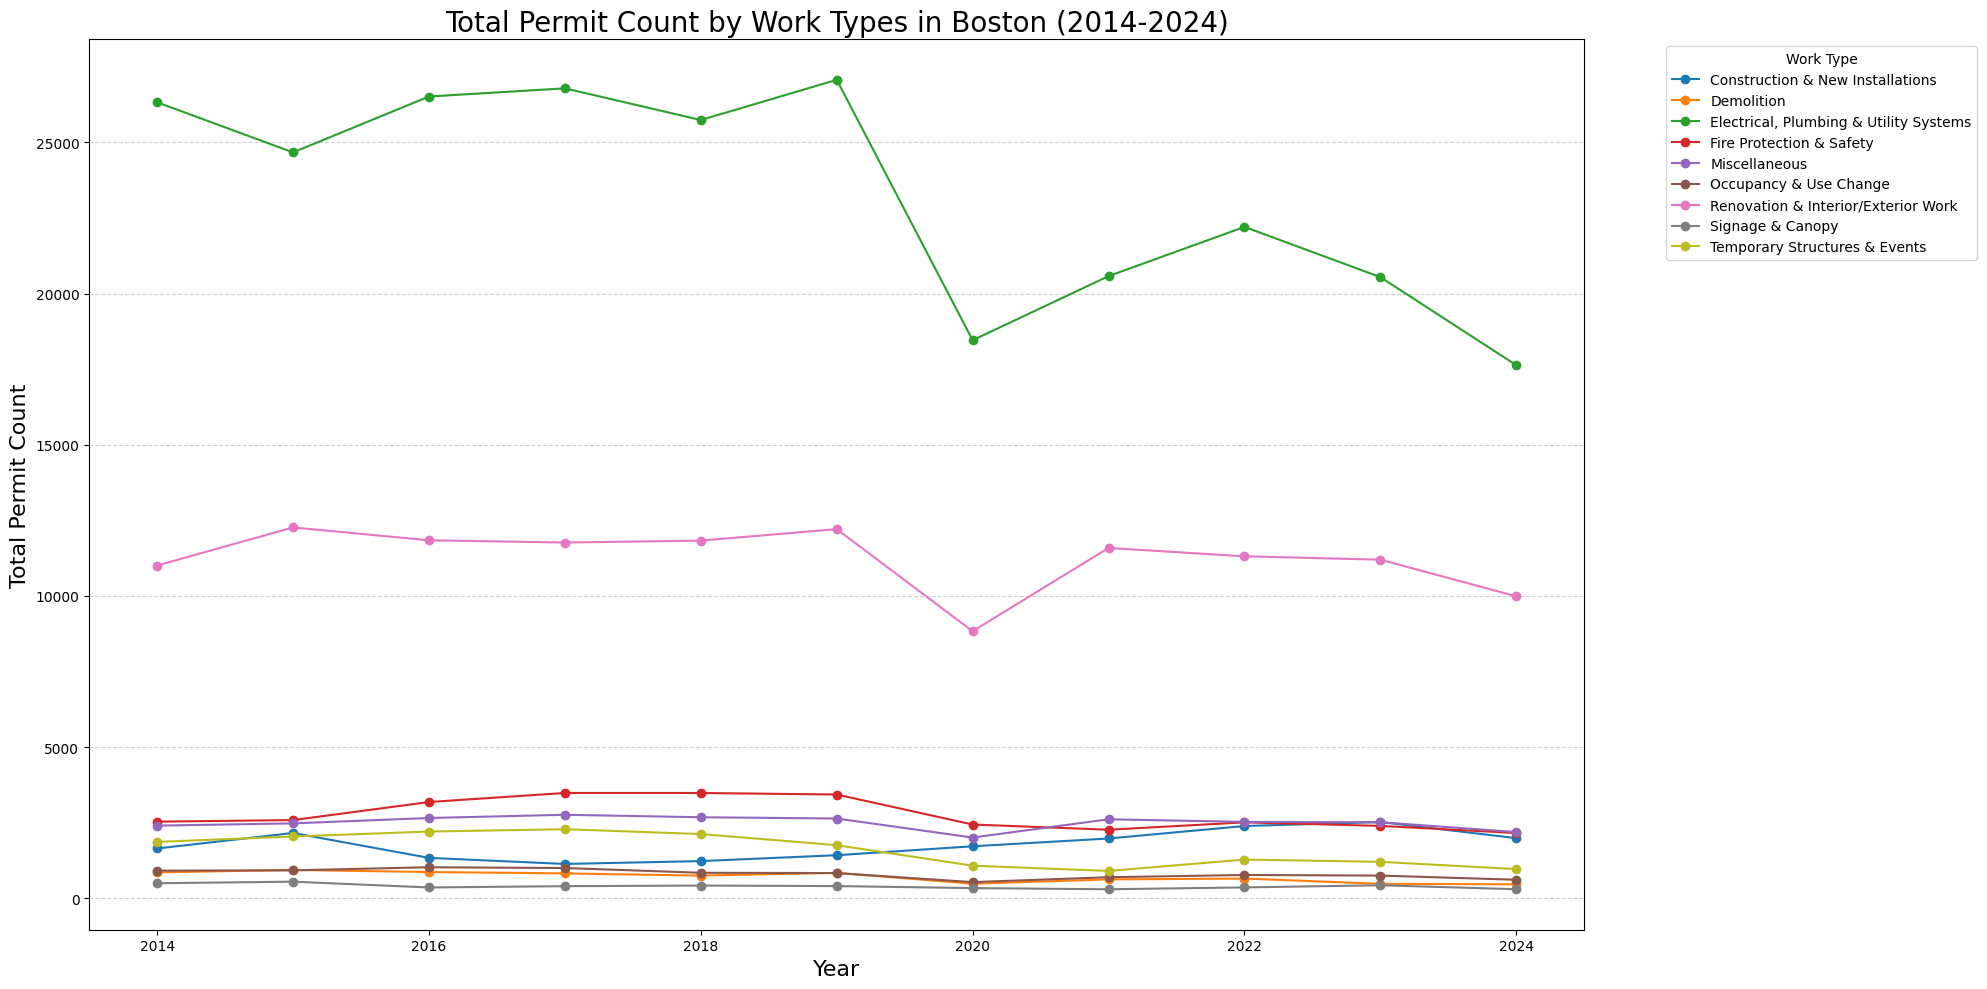

In [24]:
worktype_count = df.groupby(['issued_year', 'new_worktype']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
worktype_count.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Work Types in Boston (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Total Permit Count by Work Types in District 7 (2014-2024)

<Figure size 2000x1000 with 0 Axes>

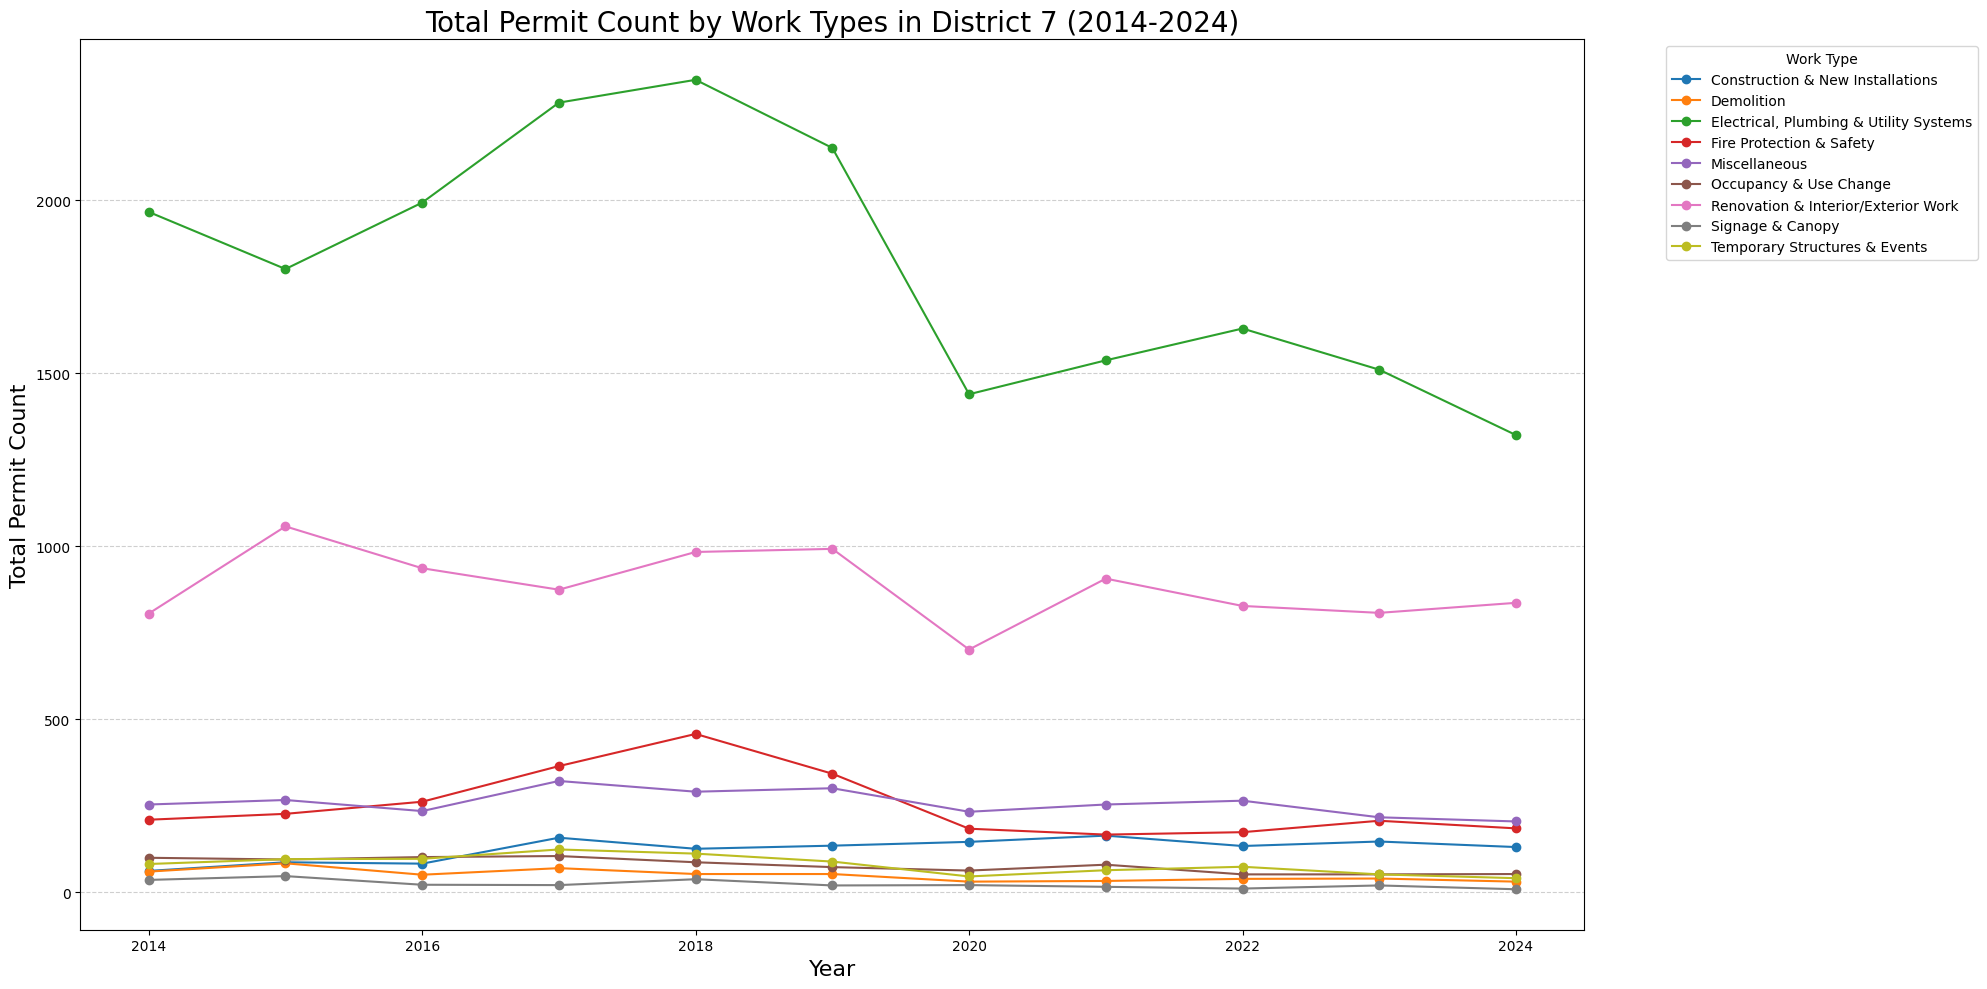

In [25]:
worktype_count_d7 = df_d7.groupby(['issued_year', 'new_worktype']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
worktype_count_d7.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Work Types in District 7 (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Findings**: 
- Boston and District 7 share similar patterns in total permit count by work types.
- Electrical, Plumbing & Utility Systems is the most common work type from 2014 to 2024, followed by Renovation and Interior/Exterior Work. 
- The remaining work types stay under 10,000 permits across the years, and are further analyzed in the following graphs. 

#### Percentage of Permits by Grouped Work Types in Boston (2014-2024)

<Figure size 1400x700 with 0 Axes>

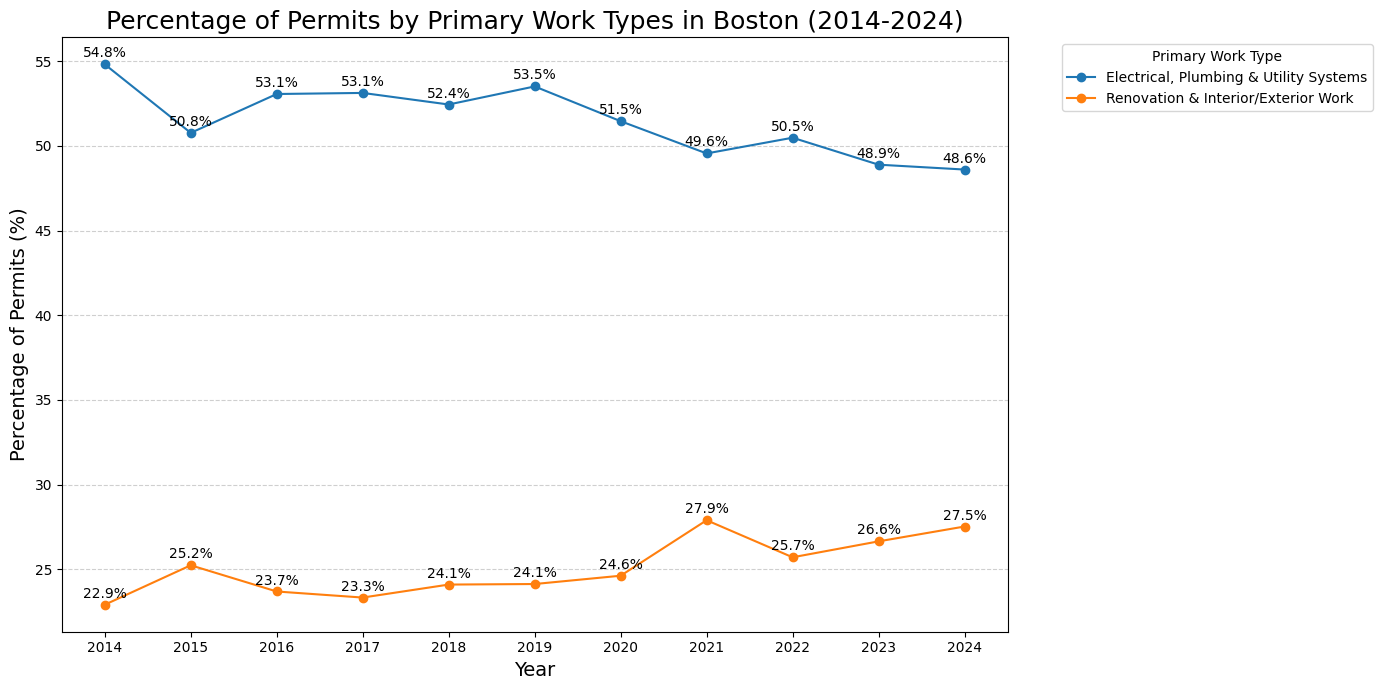

<Figure size 1400x700 with 0 Axes>

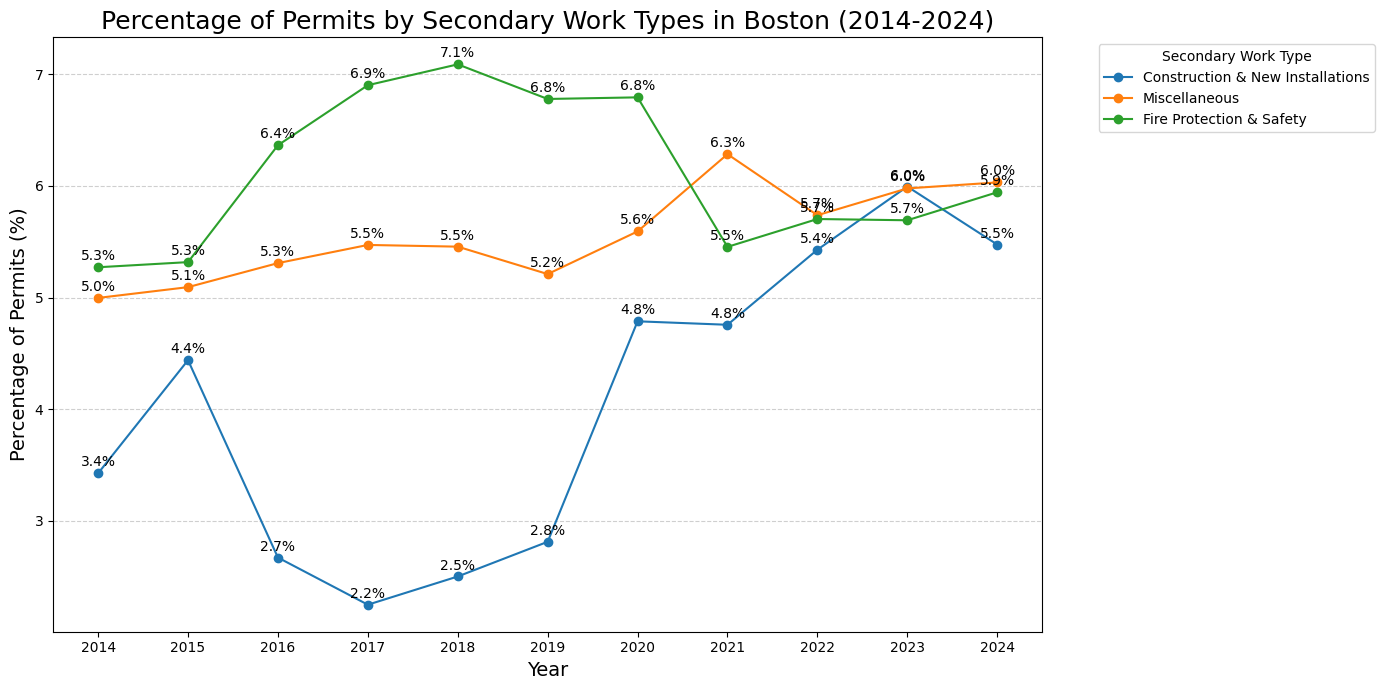

<Figure size 1400x700 with 0 Axes>

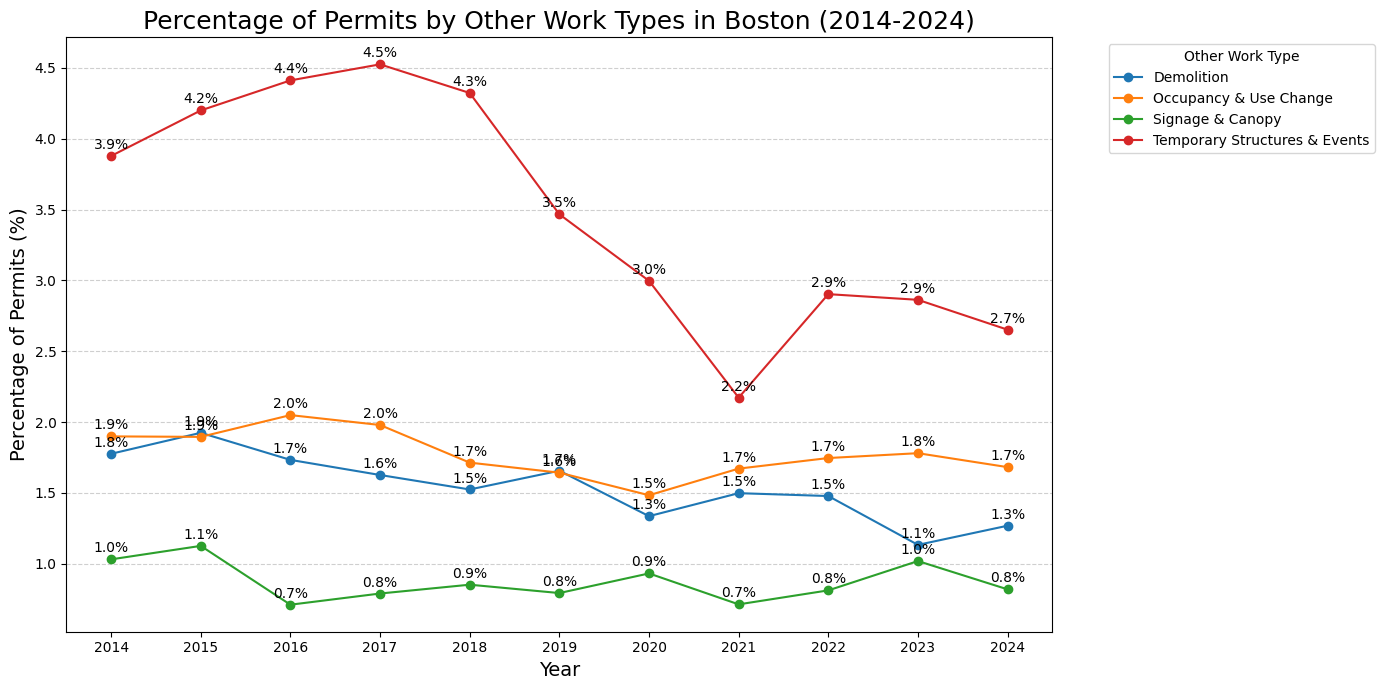

In [26]:
worktype_percent = worktype_count.div(worktype_count.sum(axis=1), axis=0) * 100

primary_worktype = ['Electrical, Plumbing & Utility Systems', 'Renovation & Interior/Exterior Work']
secondary_worktype = ['Construction & New Installations', 'Miscellaneous', 'Fire Protection & Safety']

primary_worktype_data = worktype_percent[primary_worktype]
secondary_worktype_data = worktype_percent[secondary_worktype]
other_worktype_data = worktype_percent.drop(columns=primary_worktype + secondary_worktype)

plt.figure(figsize=(14, 7))
ax1 = primary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax1.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax1.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Primary Work Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=primary_worktype_data.index, labels=primary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Primary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax2 = secondary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax2.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Secondary Work Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=secondary_worktype_data.index, labels=secondary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Secondary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax3 = other_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax3.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax3.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Other Work Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=other_worktype_data.index, labels=other_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Other Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Percentage of Permits by Grouped Work Types in District 7 (2014-2024)

<Figure size 1400x700 with 0 Axes>

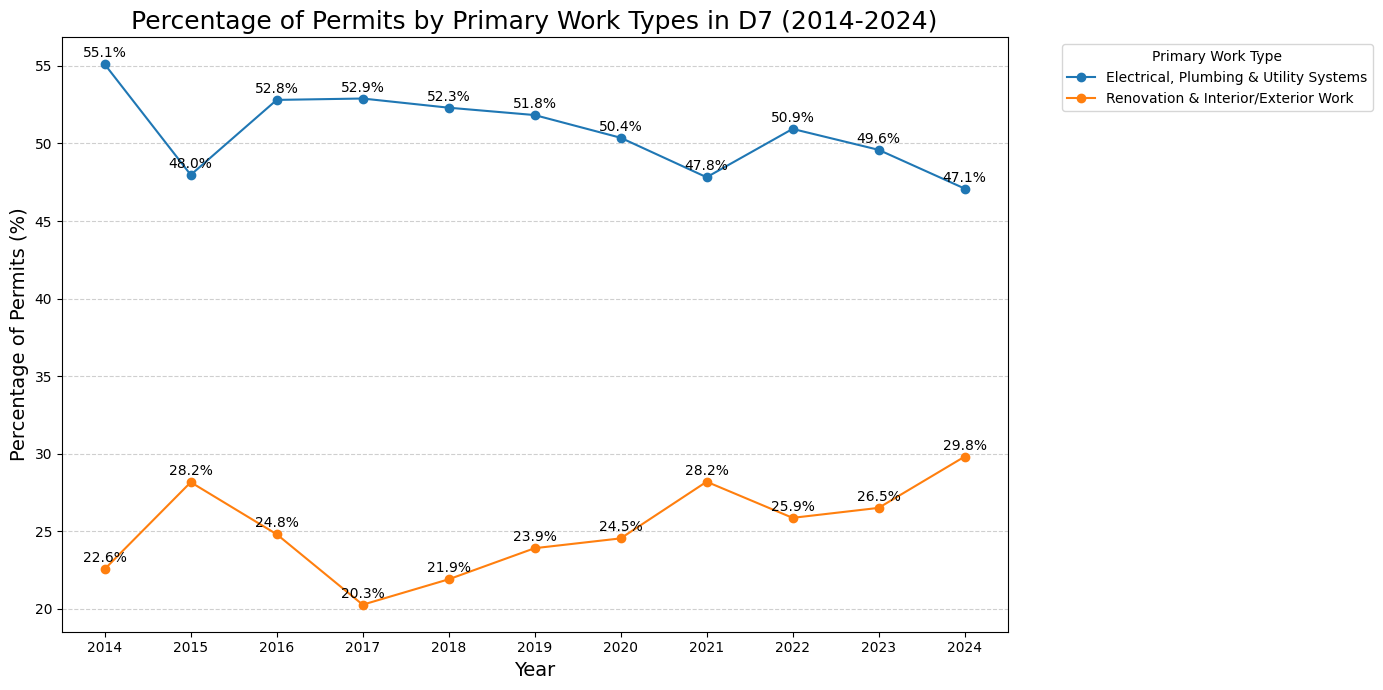

<Figure size 1400x700 with 0 Axes>

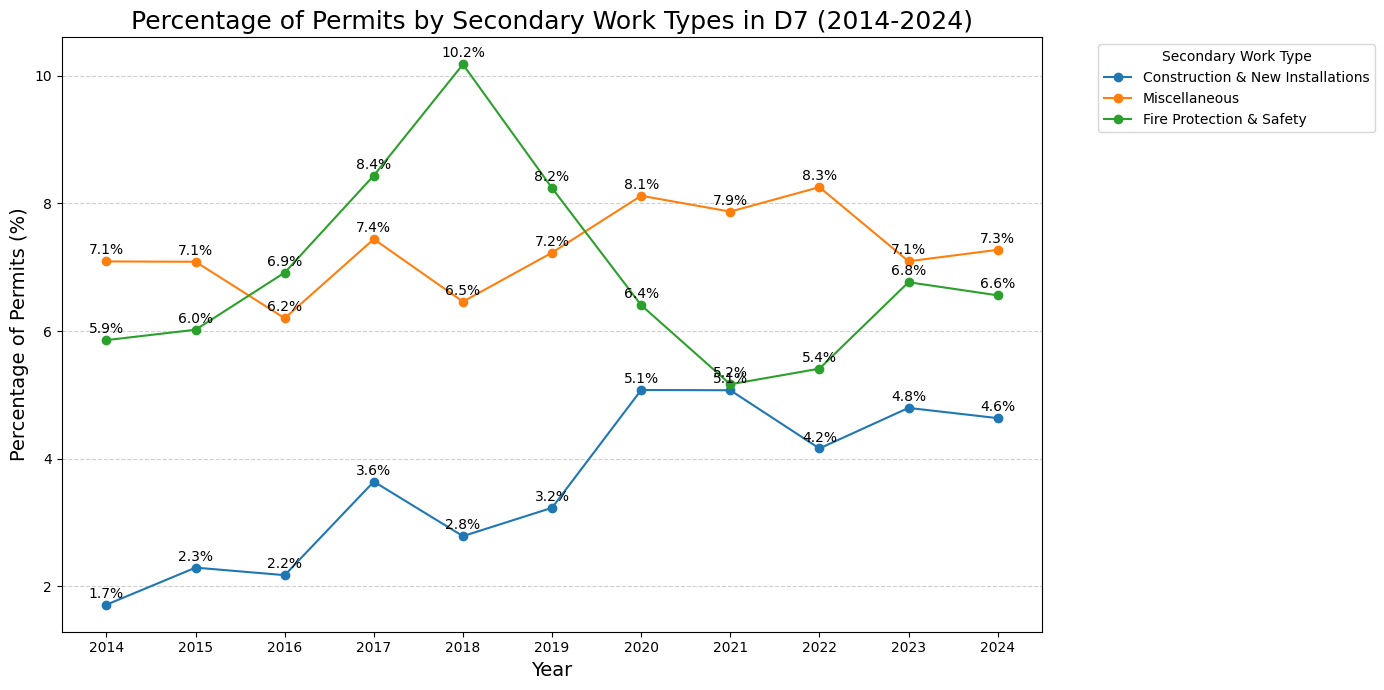

<Figure size 1400x700 with 0 Axes>

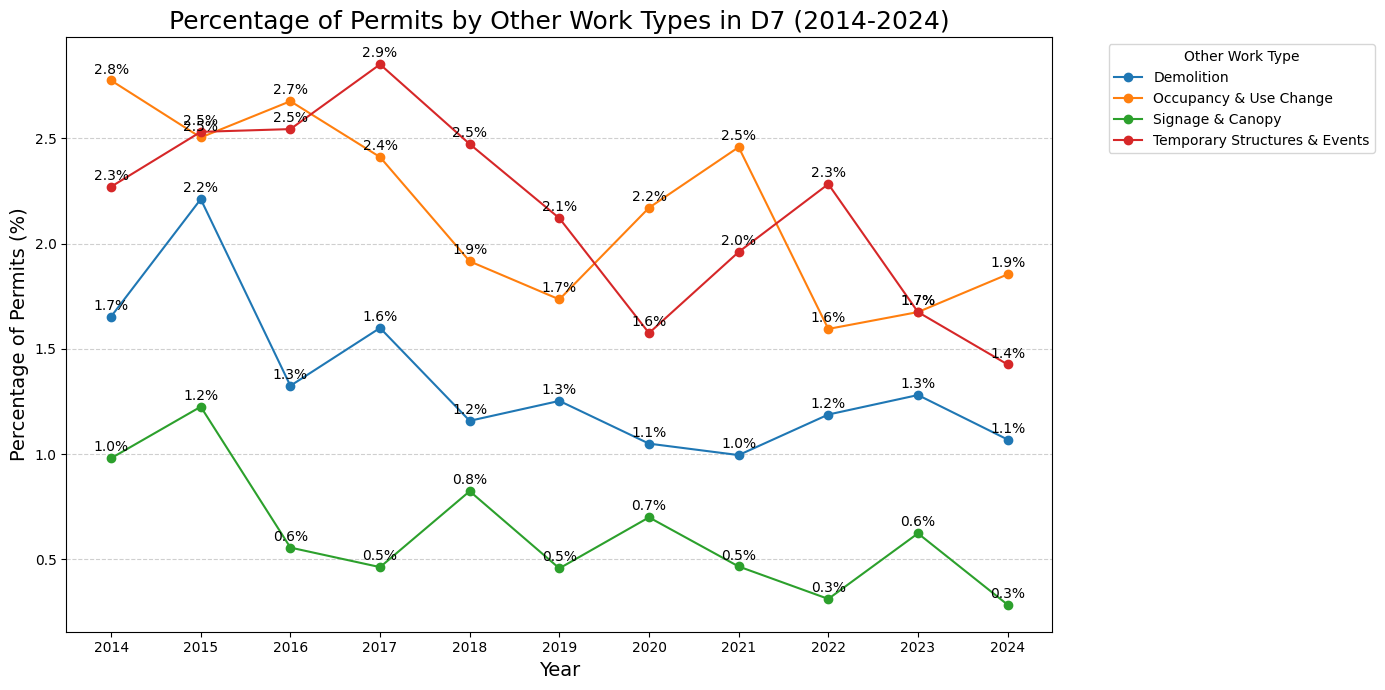

In [27]:
worktype_percent = worktype_count_d7.div(worktype_count_d7.sum(axis=1), axis=0) * 100

primary_worktype = ['Electrical, Plumbing & Utility Systems', 'Renovation & Interior/Exterior Work']
secondary_worktype = ['Construction & New Installations', 'Miscellaneous', 'Fire Protection & Safety']

primary_worktype_data = worktype_percent[primary_worktype]
secondary_worktype_data = worktype_percent[secondary_worktype]
other_worktype_data = worktype_percent.drop(columns=primary_worktype + secondary_worktype)

plt.figure(figsize=(14, 7))
ax1 = primary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax1.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax1.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Primary Work Types in D7 (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=primary_worktype_data.index, labels=primary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Primary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax2 = secondary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax2.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Secondary Work Types in D7 (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=secondary_worktype_data.index, labels=secondary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Secondary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax3 = other_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax3.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax3.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Other Work Types in D7 (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=other_worktype_data.index, labels=other_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Other Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Findings**: 
- The percentage for Electrical, Plumbing, and Utility Systems was generally decreasing, while Renovation and Interior/Exterior Work was slowly increasing. 
- Both work types took up around 78% of total permits. 
- The demands for Construction and New Installations as well as Fire Protection and Safety fluctuated significantly, while Miscellaneous is  generally stable. 
- Demolition, Occupancy and Use Change, Temporary Structures and Events, as well as Signade and Canopy appears to be under control, given their low percentages and relatively even patterns. 

#### Total Permit Count by Occupancy Types in Boston (2014-2024)

<Figure size 2000x1000 with 0 Axes>

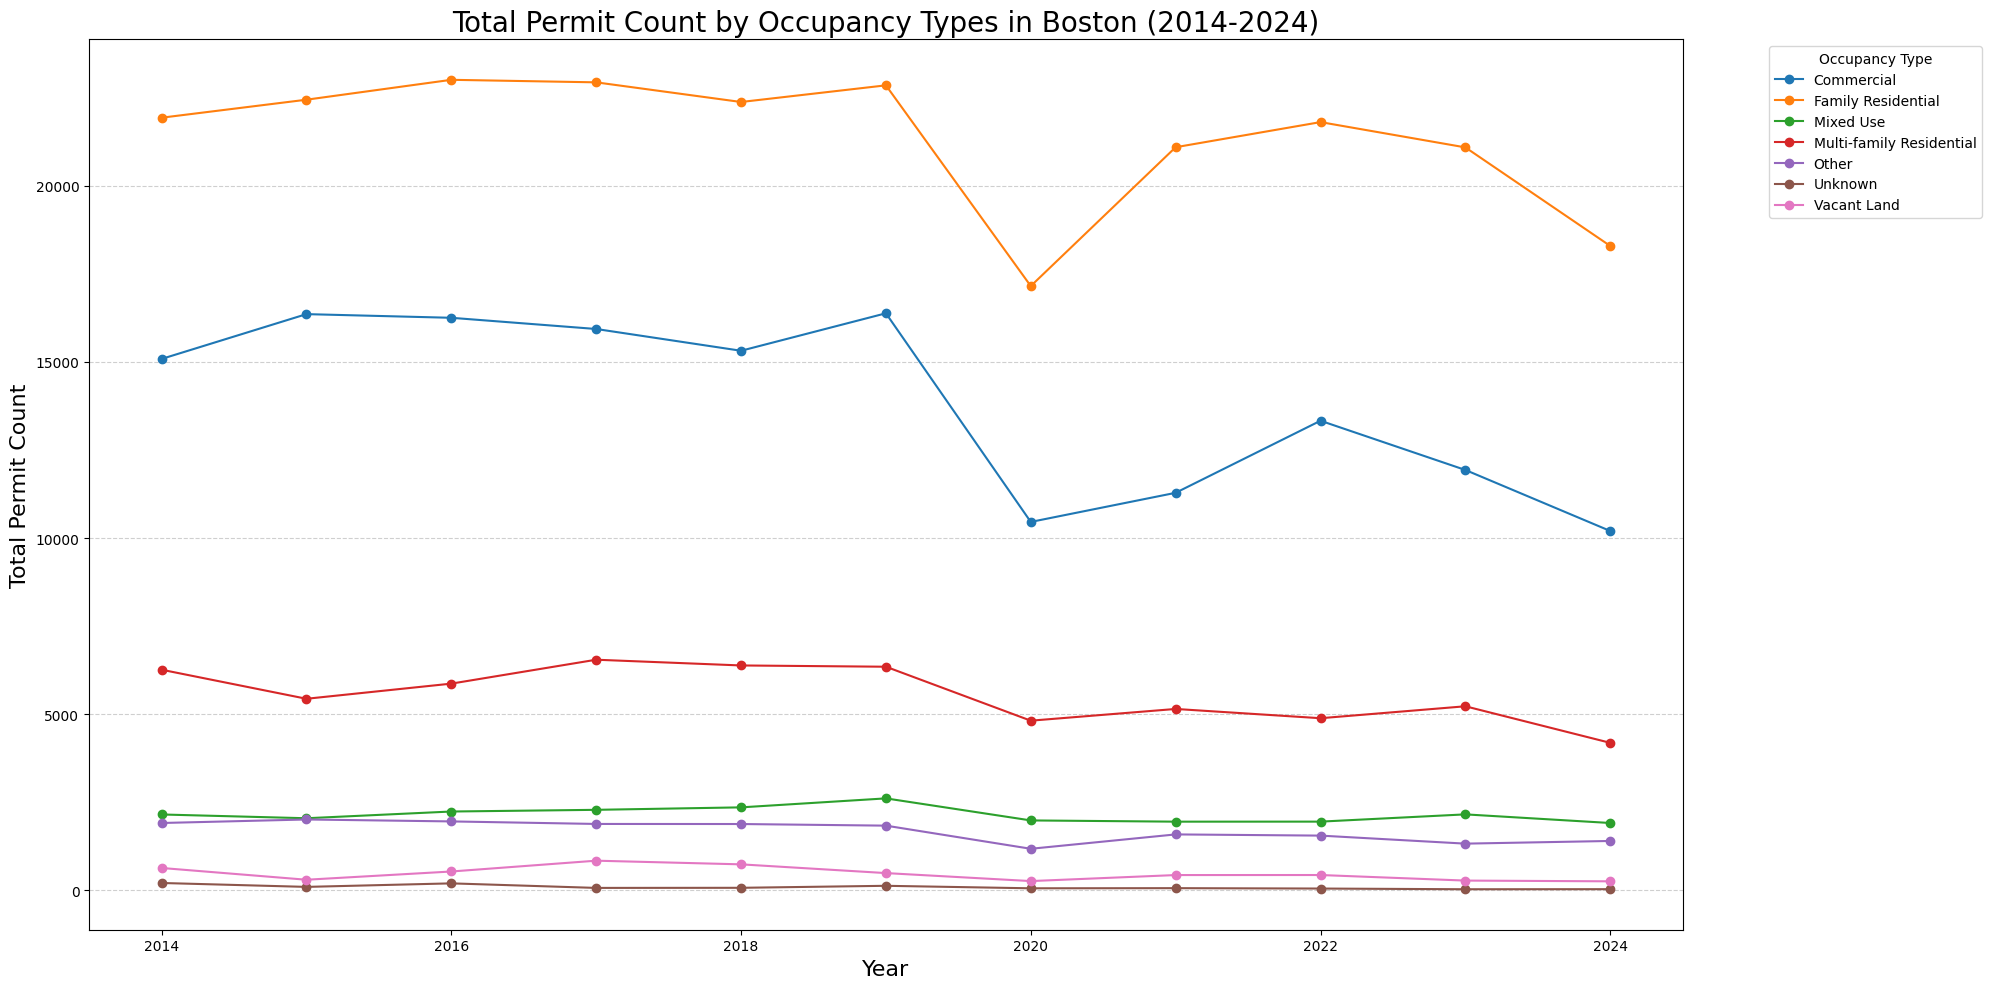

In [28]:
occupancytype_count = df.groupby(['issued_year', 'new_occupancytype_category']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
occupancytype_count.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Occupancy Types in Boston (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Occupancy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Total Permit Count by Occupancy Types in District 7 (2014-2024)

<Figure size 2000x1000 with 0 Axes>

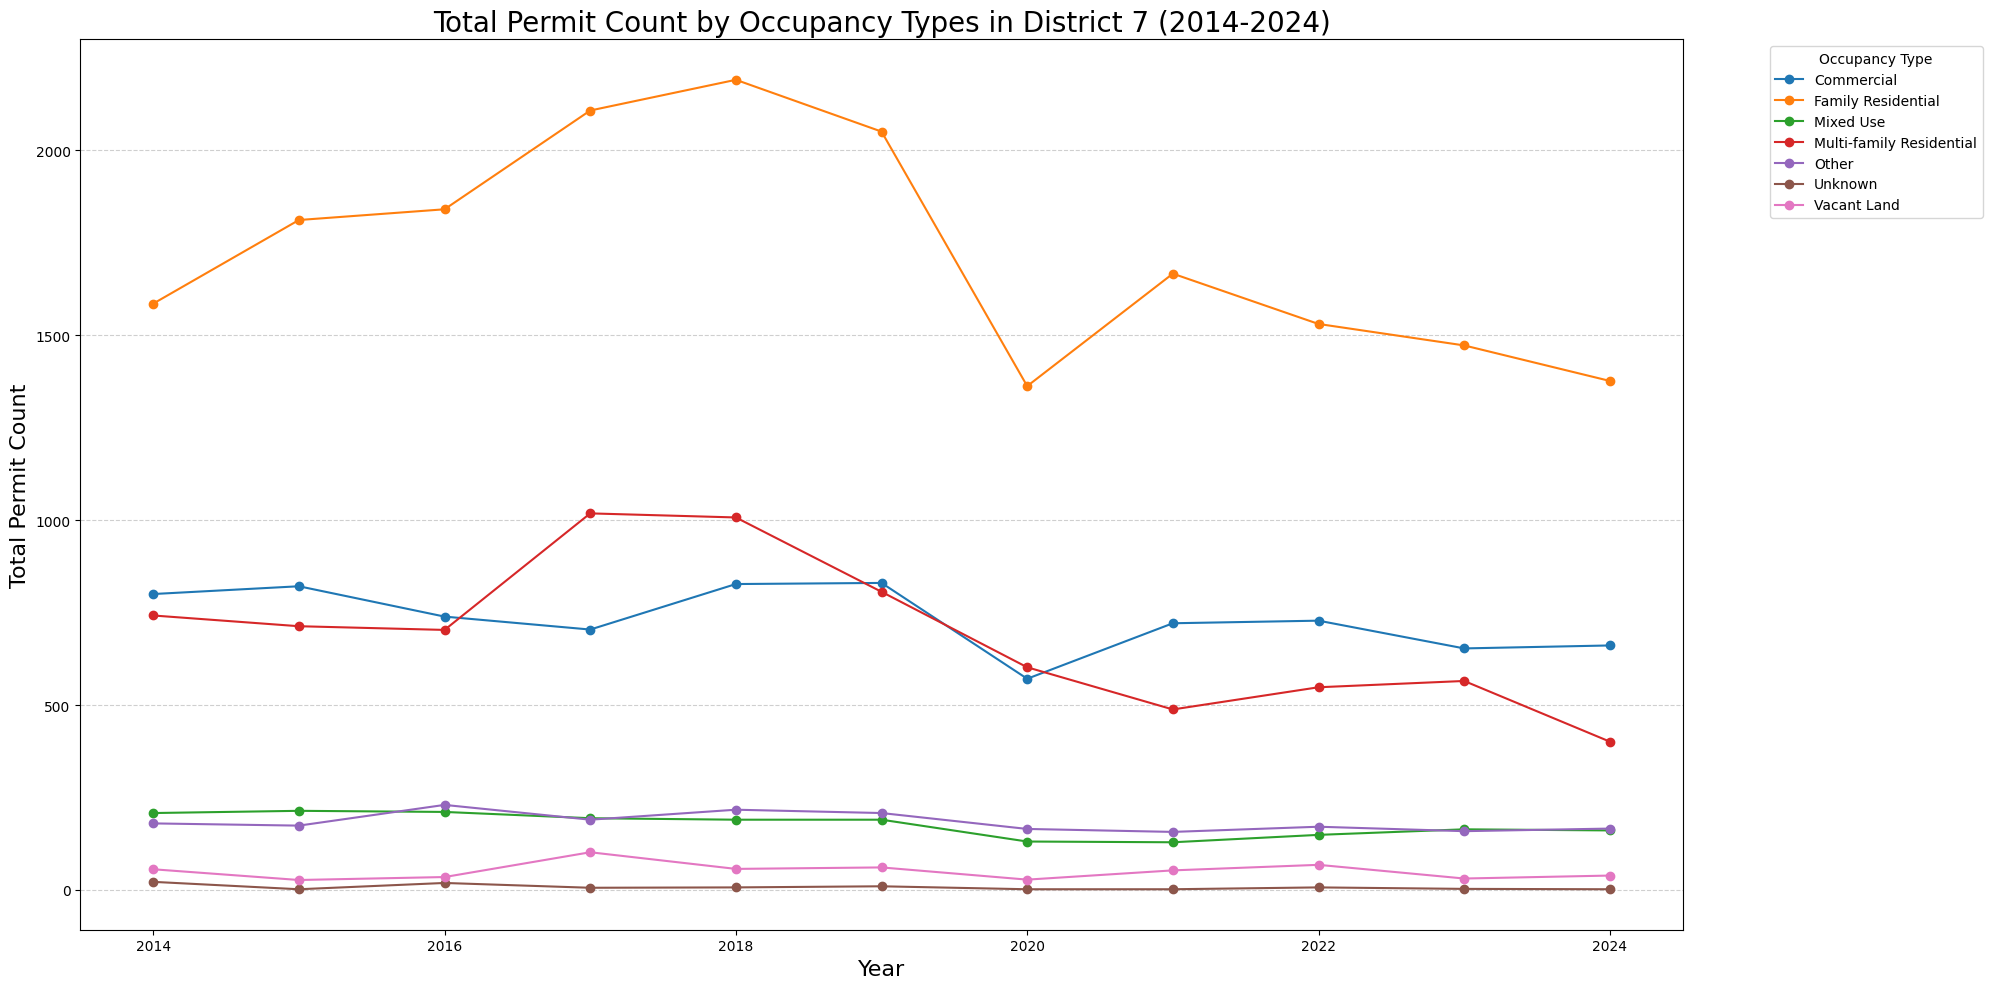

In [29]:
occupancytype_count = df_d7.groupby(['issued_year', 'new_occupancytype_category']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
occupancytype_count.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Occupancy Types in District 7 (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Occupancy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Findings**: 
- All occupancy types are decreasing or remaining relatively the same since 2023. 
- The most common occupancy type is a family of 1 to 2.
- Family of 1-3, 1-4, and 1 unit are common occupancy types as well.

#### Total Permit Count by Status in Boston (2014-2024)

<Figure size 1200x600 with 0 Axes>

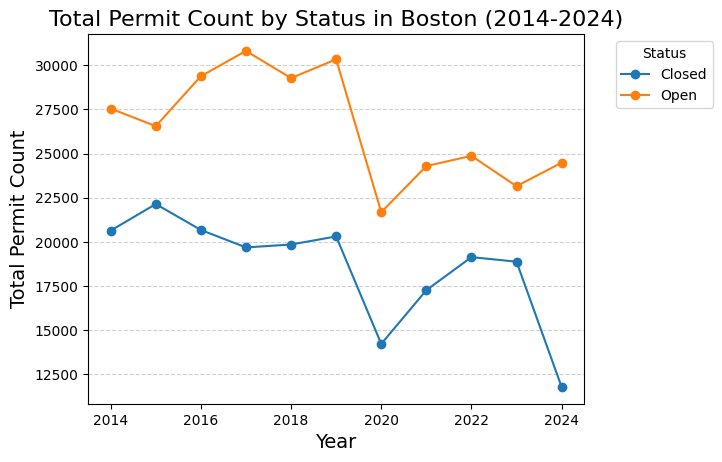

In [30]:
status_count = df.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
status_count.plot(kind='line', marker='o', linestyle='-')

plt.title('Total Permit Count by Status in Boston (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Permit Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Total Permit Count by Status in District 7 (2014-2024)

<Figure size 1200x600 with 0 Axes>

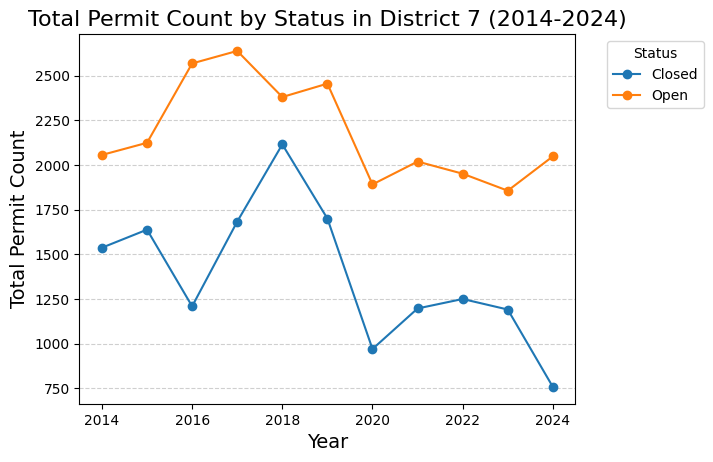

In [31]:
status_count = df_d7.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
status_count.plot(kind='line', marker='o', linestyle='-')

plt.title('Total Permit Count by Status in District 7 (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Permit Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Findings**: 
- Open Permits are higher than Closed Permits from 2010 to 2024. 

#### Percentage of Permit by Status in Boston (2014-2024)

<Figure size 1200x600 with 0 Axes>

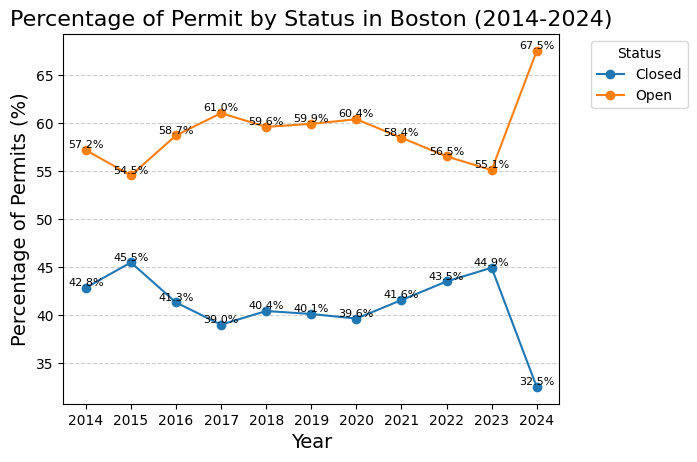

In [32]:
status_count = df.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

status_percent = status_count.div(status_count.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
status_percent.plot(kind='line', marker='o', linestyle='-')

for year in status_percent.index:
    for status in status_percent.columns:
        plt.text(year, status_percent.loc[year, status], 
                 f"{status_percent.loc[year, status]:.1f}%", 
                 ha='center', va='bottom', fontsize=8)

plt.title('Percentage of Permit by Status in Boston (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=status_percent.index, labels=status_percent.index.astype(int), rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Percentage of Permit by Status in District 7 (2014-2024)

<Figure size 1200x600 with 0 Axes>

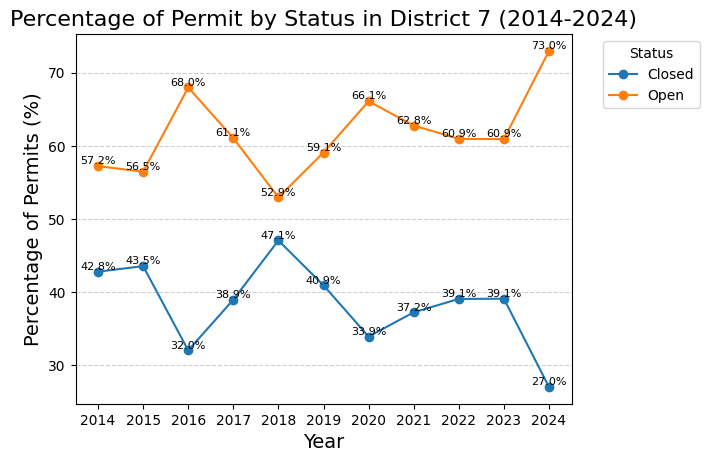

In [33]:
status_count = df_d7.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

status_percent = status_count.div(status_count.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
status_percent.plot(kind='line', marker='o', linestyle='-')

for year in status_percent.index:
    for status in status_percent.columns:
        plt.text(year, status_percent.loc[year, status], 
                 f"{status_percent.loc[year, status]:.1f}%", 
                 ha='center', va='bottom', fontsize=8)

plt.title('Percentage of Permit by Status in District 7 (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=status_percent.index, labels=status_percent.index.astype(int), rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Findings**: 
- Open Permits were gradually decreasing from 2021 to 2023, but began increasing afterward. 
- In contrast, Closed Permits were slightly increasing from 2021 to 2023, but started decreasing afterward. 

#### Total Permit Count by Neighborhood (2014-2024)

/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_79039/579852798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=permit_count_by_city, x='City', y='Permit Count', palette='viridis')


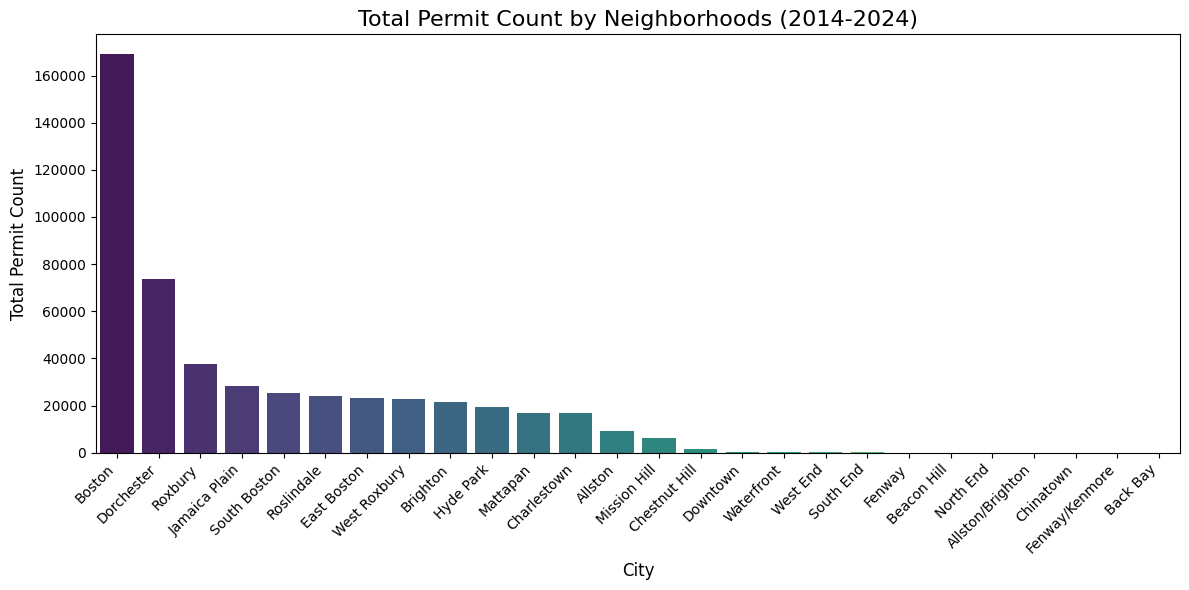

In [34]:
permit_count_by_city = df.groupby('new_city')['permitnumber'].count().reset_index()
permit_count_by_city = permit_count_by_city.sort_values(by='permitnumber', ascending=False)
permit_count_by_city.columns = ['City', 'Permit Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=permit_count_by_city, x='City', y='Permit Count', palette='viridis')

plt.title('Total Permit Count by Neighborhoods (2014-2024)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Permit Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_79039/313441934.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=permit_value_by_city, x='City', y='Total Permit Value', palette='viridis')


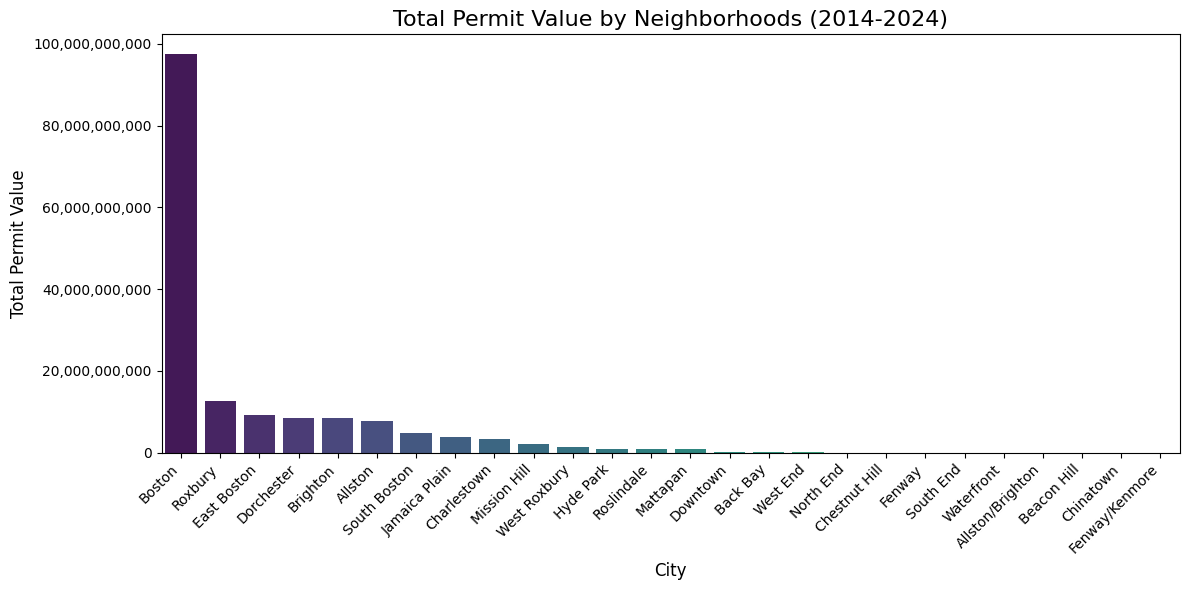

In [37]:
import matplotlib.ticker as ticker

permit_value_by_city = df.groupby('new_city')['declared_valuation'].sum().reset_index()
permit_value_by_city = permit_value_by_city.sort_values(by='declared_valuation', ascending=False)
permit_value_by_city.columns = ['City', 'Total Permit Value']

plt.figure(figsize=(12, 6))
sns.barplot(data=permit_value_by_city, x='City', y='Total Permit Value', palette='viridis')

plt.title('Total Permit Value by Neighborhoods (2014-2024)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Permit Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()


## Conclusion

- Electrical, Plumbing & Utility Systems and Renovation and Interior/Exterior Work are the most common work of building permits.
- Construction and New Installations as well as Fire Protection and Safety should be closely monitored to prevent larger issues occured.
- All occupancy types are decreasing or remaining relatively the same since 2023.
- 75% of the permits remain open, which is significantly higher compared to the years before. 